In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d salader/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/salader/dogsvscats
License(s): unknown
 98% 1.05G/1.06G [00:10<00:00, 255MB/s]
100% 1.06G/1.06G [00:10<00:00, 112MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogsvscats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras import Sequential
from keras.applications.vgg16 import VGG16

In [7]:
base_conv = VGG16(
    weights = 'imagenet',
    input_shape = (150,150,3),
    include_top = False
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [8]:
model = Sequential()
model.add(base_conv)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
base_conv.trainable = False

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip =True
)
test_datagen = ImageDataGenerator(
    rescale = 1/255
)
train_generator = train_datagen.flow_from_directory(
    directory = '/content/train',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)
validation_generator = test_datagen.flow_from_directory(
    directory = '/content/test',
    target_size = (150,150),
    class_mode = 'binary',
    batch_size = batch_size
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 175s 262ms/step - accuracy: 0.8357 - loss: 0.3967 - val_accuracy: 0.9116 - val_loss: 0.2068
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 247ms/step - accuracy: 0.9001 - loss: 0.2342 - val_accuracy: 0.9138 - val_loss: 0.2087
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.9080 - loss: 0.2183 - val_accuracy: 0.9156 - val_loss: 0.1967
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.9088 - loss: 0.2138 - val_accuracy: 0.9108 - val_loss: 0.2069
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 245ms/step - accuracy: 0.9170 - loss: 0.1973 - val_accuracy: 0.9154 - val_loss: 0.2006
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 245ms/step - accuracy: 0.9218 - loss: 0.1882 - val_accuracy: 0.9196 - val_loss: 0.1942
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 244ms/step - accuracy: 0.9225 - loss: 0.1846 - val_accuracy: 0.9190 - val_loss: 0.1882
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 245ms/step - accuracy: 0.9256 -

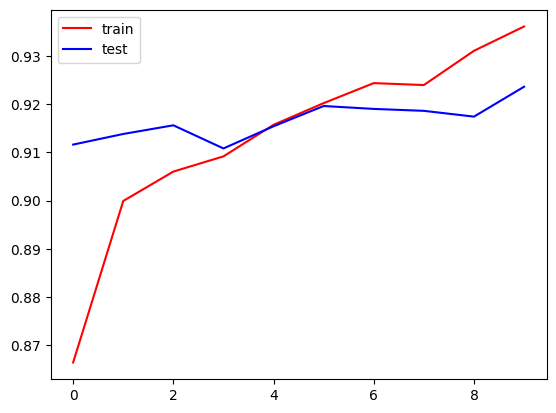

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test' )
plt.legend()
plt.show()

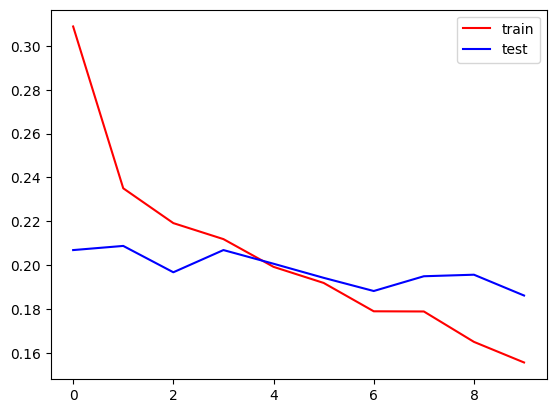

In [18]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='test' )
plt.legend()